In [12]:
# notebook to inspect the SCL data 

%matplotlib inline
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [2]:
data=pd.read_csv("SEA_DATA/Energy Consumption/SCL_demand.csv",skiprows=4)

In [3]:
data.head()

,Category,Series ID: EBA.SCL-ALL.D.HL megawatthours
0,01/14/20 15:00 -0800,1443.0
1,01/14/20 14:00 -0800,1694.0
2,01/14/20 13:00 -0800,1718.0
3,01/14/20 12:00 -0800,1733.0
4,01/14/20 11:00 -0800,1724.0


In [4]:
data.tail()

,Category,Series ID: EBA.SCL-ALL.D.HL megawatthours
39801,07/01/15 05:00 -0700,807.0
39802,07/01/15 04:00 -0700,796.0
39803,07/01/15 03:00 -0700,802.0
39804,07/01/15 02:00 -0700,833.0
39805,07/01/15 01:00 -0700,873.0


In [5]:
columns=data.columns.values
# not sure what all the columns mean
# in particular what is the last number in category? 
print(columns)

['Category' 'Series ID: EBA.SCL-ALL.D.HL megawatthours']


In [6]:
# create new dataframe 

SCL=pd.DataFrame()
SCL["time"]=data["Category"].values
SCL["MWh"]=data["Series ID: EBA.SCL-ALL.D.HL megawatthours"]

In [7]:
SCL.head()

,time,MWh
0,01/14/20 15:00 -0800,1443.0
1,01/14/20 14:00 -0800,1694.0
2,01/14/20 13:00 -0800,1718.0
3,01/14/20 12:00 -0800,1733.0
4,01/14/20 11:00 -0800,1724.0


In [8]:
# shape of data frame
SCL.shape

(39806, 2)

In [9]:
# change time column to a datetime 
SCL.time=pd.to_datetime(SCL.time.values,utc=True)

In [10]:
SCL.head()

,time,MWh
0,2020-01-14 23:00:00+00:00,1443.0
1,2020-01-14 22:00:00+00:00,1694.0
2,2020-01-14 21:00:00+00:00,1718.0
3,2020-01-14 20:00:00+00:00,1733.0
4,2020-01-14 19:00:00+00:00,1724.0


In [17]:
# add year, month, day, hour
SCL["year"]=SCL.time.dt.year
SCL["month"]=SCL.time.dt.month
SCL["day"]=SCL.time.dt.day
SCL["hour"]=SCL.time.dt.hour

# add date
SCL["date"]=pd.to_datetime({"year":SCL["year"],"month":SCL["month"],"day":SCL["day"]})

# add day of week 
SCL["day of week"]=SCL.date.dt.dayofweek
#SCL["weekday"]=SCL.date.dt.weekday

# add weekend check
SCL["weekend"]=((SCL.date.dt.dayofweek // 5 == 1)).astype(int)

# add holiday check
cal = calendar();
holidays=cal.holidays(start=SCL.index.min(), end=SCL.index.max())
SCL["holiday"]=SCL.index.isin(holidays)

# add 3 day weekend check
thday=[False]*SCL.shape[0]

# add 3 day holiday weekend check
for i in range(0,SCL.shape[0]):
    if SCL["holiday"].iloc[i]==True:

        # on a Monday
        if SCL["day"].iloc[i]==0:
            thday[i]=True
            if i > 1:
                thday[i-1]=True
            if i > 2:
                thday[i-2]=True
        # on a Friday
        if SCL["day"].iloc[i]==4:
            thday[i]=True

            if i < SCL.shape[0]-1:
                thday[i+1]=True
            if i < SCL.shape[0]-2:
                thday[i+2]=True

SCL["3-day holiday wkend"]=thday

In [18]:
SCL.head()

,time,MWh,year,month,day,hour,date,day of week,weekend,holiday,3-day wkend,3-day holiday wkend
0,2020-01-14 23:00:00+00:00,1443.0,2020,1,14,23,2020-01-14,1,0,False,False,False
1,2020-01-14 22:00:00+00:00,1694.0,2020,1,14,22,2020-01-14,1,0,False,False,False
2,2020-01-14 21:00:00+00:00,1718.0,2020,1,14,21,2020-01-14,1,0,False,False,False
3,2020-01-14 20:00:00+00:00,1733.0,2020,1,14,20,2020-01-14,1,0,False,False,False
4,2020-01-14 19:00:00+00:00,1724.0,2020,1,14,19,2020-01-14,1,0,False,False,False


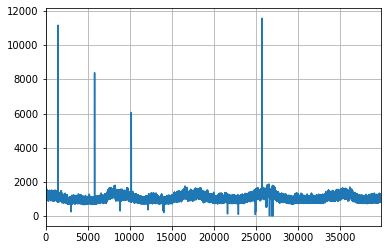

In [62]:
# plot data 

SCL.MWh.plot(grid=True)

In [63]:
'''
To do: 
* Have Jon add a column for weekend not weekend, holiday, and threeday weekend
* Have Renee write fucntion to clean the data. 

''' 


'\nTo do: \n* Have Jon add a column for weekend not weekend, holiday, and threeday weekend\n* Have Renee write fucntion to clean the data. \n\n'